In [12]:
from cleaning_script import prep_data
from model1 import my_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,recall_score,precision_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
#call clean_data on each train and test X inside prep data to split and get data ready for modeling
df_train,y_train,df_test,y_test= prep_data()

In [39]:
print("Logistic Regression 1")
print()
model_log = LogisticRegression(penalty='l1')

print("TRAIN")
print("ROC_AUC Logistic: ", cross_val_score(LogisticRegression(),df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy Logistic: ", cross_val_score(LogisticRegression(),df_train,y_train,cv=5).mean())
print("f1 Logistic: ", cross_val_score(LogisticRegression(),df_train,y_train,cv=5,scoring='f1').mean())

model_log.fit(df_train,y_train)
y_pred = model_log.predict(df_test)
print()
print("TEST")
print("ROC_AUC Logistic: ", roc_auc_score(y_test,y_pred))
print("Accuracy Logistic: ", accuracy_score(y_test,y_pred))
print("f1 Logistic: ", f1_score(y_test,y_pred))

Logistic Regression 1

TRAIN
ROC_AUC Logistic:  0.8664619834948086
Accuracy Logistic:  0.7860669226549644
f1 Logistic:  0.6834526480336256

TEST
ROC_AUC Logistic:  0.7528683028793485
Accuracy Logistic:  0.7849665924276169
f1 Logistic:  0.6811953112101701


In [36]:
print("RANDOM FOREST 1")
print()
#fit RF model
model = RandomForestClassifier()

#train stats
print("TRAIN on RF")
print("ROC_AUC score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,df_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='f1').mean())

#call pred and print test stats
model.fit(df_train,y_train)
y_pred = model.predict(df_test)
print()
print("TEST on RF")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))

RANDOM FOREST 1

TRAIN on RF
ROC_AUC score:  0.8892857562442726
Accuracy score:  0.8144267690619857
f1 score:  0.7369319111050956

TEST on RF
ROC_AUC score:  0.7880613446261119
Accuracy score:  0.8130289532293986
f1 score:  0.7290624495723738


In [20]:
#grid search for RF
param_grid={'n_estimators': [300,400,500],
            'max_depth': [3, None,1,2,5],
            'max_features': ['sqrt','log2', None]
           }

grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,scoring="f1",cv=5)
grid.fit(df_train,y_train)

best_estimator = grid.best_params_

In [40]:
#new RF model after GS
best_rf_model = grid.best_estimator_

#new RF params
print("RANDOM FOREST 2 (GS)")
print()

#train stats
print("TRAIN on RF_GS")
print("ROC_AUC score: ", cross_val_score(best_rf_model,df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_rf_model,df_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_rf_model,df_train,y_train,cv=5,scoring='f1').mean())

#predict and get test stats
best_rf_model.fit(df_train,y_train)
y_pred = best_rf_model.predict(df_test)

print()
print("TEST on RF_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))

RANDOM FOREST 2 (GS)

TRAIN on RF_GS
ROC_AUC score:  0.912223651610444
Accuracy score:  0.8375205704882063
f1 score:  0.7809174448833118

TEST on RF_GS
ROC_AUC score:  0.831062633925188
Accuracy score:  0.8388641425389755
f1 score:  0.7820454887784304


In [16]:
#Decision tree trial 1
print("DECISION TREE 1")
print()
model = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=13, min_samples_split=2)

#train stats
print("TRAIN on DT")
print("ROC_AUC score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,df_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='f1').mean())

#predict and get test stats
model.fit(df_train,y_train)
y_pred = model.predict(df_test)

print()
print("TEST on DT")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))

TRAIN on DT
ROC_AUC score:  0.8764307588680811
Accuracy score:  0.8088315962698847
f1 score:  0.7396114980886782
TEST on DT
ROC_AUC score:  0.7893913380116717
Accuracy score:  0.8062360801781737
f1 score:  0.730399752091726


In [ ]:
#GBtrial 1
print("GRADIENT BOOSTING 1")
print()
model = GradientBoostingClassifier()

print("TRAIN on GB_GS")
print("ROC_AUC score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,df_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,df_train,y_train,cv=5,scoring='f1').mean())

model.fit(df_train,y_train)
y_pred = model.predict(df_test)
print()
print("TEST")
print("ROC_AUC DT: ", roc_auc_score(y_test,y_pred))
print("Accuracy DT: ", accuracy_score(y_test,y_pred))
print("f1 DT: ", f1_score(y_test,y_pred))

In [31]:
#gradient boosting grid search
gb_grid = {'n_estimators': [10,50,100],
                  'min_samples_leaf': [1, 7, 9, 13],
                  'max_depth': [3, 4, 5, 6, 7],
                  'max_features': [2, 5, 10, 12,15],
                  'learning_rate': [0.05, 0.02, 0.01,.1,1]}
gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gb_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(df_train, y_train)

print( "best parameters:", gb_gridsearch.best_params_ )

best_gb_model = gb_gridsearch.best_estimator_

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 42.7min finished


best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 7, 'n_estimators': 100}


In [4]:
best_gb_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [5]:
best_gb_model.fit(df_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
#GBtrial 2 GS
#Best so far
print("GRADIENT BOOSTING 2 GS")
print()

print("TRAIN on GB_GS")
print("ROC_AUC score: ", cross_val_score(best_gb_model,df_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_gb_model,df_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_gb_model,df_train,y_train,cv=5,scoring='f1').mean())

best_gb_model.fit(df_train,y_train)
y_pred = best_gb_model.predict(df_test)

print()
print("TEST on GB_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

GRADIENT BOOSTING 2 GS

TRAIN on GB_GS
ROC_AUC score:  0.9102914972939526
Accuracy score:  0.8375754251234231
f1 score:  0.7762625741904634

TEST on GB_GS
ROC_AUC score:  0.8289546040981968
Accuracy score:  0.8376391982182628
f1 score:  0.7796251511487303
recall score:  0.7979579207920792
precision score:  0.7621158392434988


In [6]:
def permutation_importance(model, X_test, y_test, scorer=f1_score):
    ''' Calculates permutation feature importance for a fitted model
    
    Parameters
    ----------
    model: anything with a predict() method
    X_test, y_test: numpy arrays of data
        unseen by model
    scorer: function. Should be a "higher is better" scoring function,
        meaning that if you want to use an error metric, you should
        multiply it by -1 first.
        ex: >> neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)
            >> permutation_importance(mod, X, y, scorer=neg_mse)
    
    Returns
    -------
    feat_importances: numpy array of permutation importance
        for each feature
    
    '''
    
    feat_importances = np.zeros(X_test.shape[1])
    test_score = scorer(model.predict(X_test), y_test)
    for i in range(X_test.shape[1]):
        X_test_shuffled = shuffle_column(X_test, i)
        test_score_permuted = scorer(y_test, model.predict(X_test_shuffled))
        feat_importances[i] = test_score - test_score_permuted
    return feat_importances

def shuffle_column(X, feature_index):
    ''' 
    Parameters
    ----------
    X: numpy array
    feature_index: int
    
    Returns
    -------
    X_new: numpy array
    
    Returns a new array identical to X but
    with all the values in column feature_index
    shuffled
    '''   
    
    X_new = X.copy()
    np.random.shuffle(X_new[:,feature_index])
    return X_new

In [7]:
## Plot of feature importances
def plot_feat_import(f_imps, names, n):
    sorts = np.argsort(f_imps)
    
    last_x = f_imps[sorts[-n:]]
    last_x_names = names[sorts[-n:]]

    idx = np.arange(len(names))

    plt.barh(idx[-n:], last_x, align='center')
    plt.yticks(idx[-n:], last_x_names)

    plt.title("Permutation Importances in Random Forrest")
    plt.xlabel('Relative Importance of Feature')
    plt.ylabel('Feature Name')
    plt.savefig("feature_importances.jpg")
    plt.show()

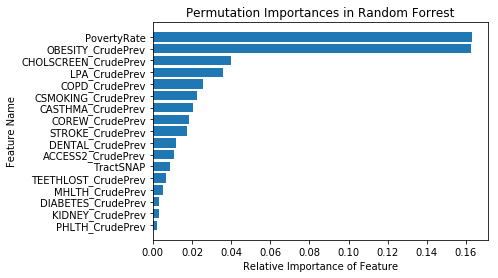

In [52]:
f_imp = permutation_importance(best_gb_model,df_test.values,y_test.values)
plot_feat_import(f_imp, df_test.columns, 20)

In [32]:
y_predproba = best_gb_model.predict_proba(df_test)

In [37]:
fpr,tpr,thresholds=roc_curve(y_test.values,y_predproba[:,1])

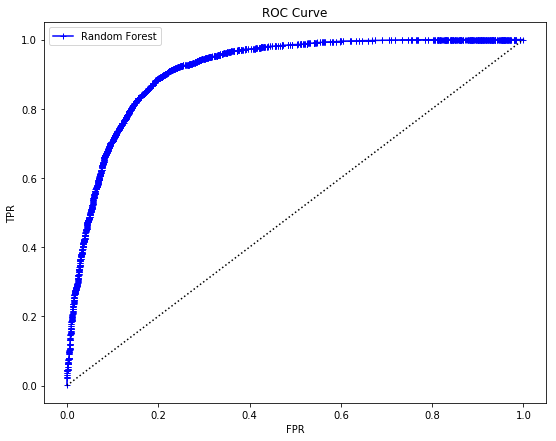

In [51]:
#ROC:
fig,ax = plt.subplots(1,1,figsize=(9,7))
ax.plot(fpr, tpr,
         label='Random Forest',
         marker='+', color='blue')
ax.plot([0,1],[0,1], 'k:')
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC Curve");

In [41]:
def sol_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()


In [43]:
tprs, fprs, thresholds = sol_curve(y_predproba[:,1],y_test.values)

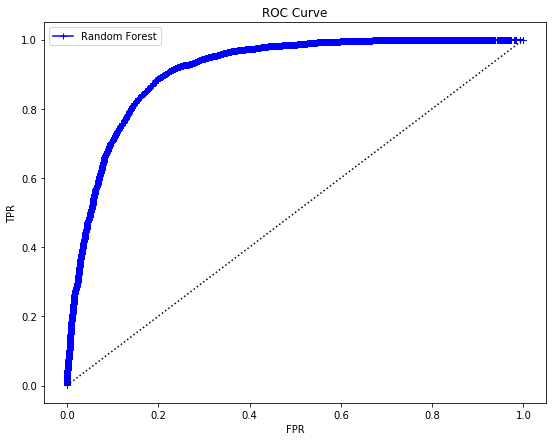

In [50]:
#ROC:
fig,ax = plt.subplots(1,1,figsize=(9,7))
ax.plot(fprs, tprs,
         label='Random Forest',
         marker='+', color='blue')
ax.plot([0,1],[0,1], 'k:')
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC Curve");

In [ ]:
print("hello")